In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
import pymysql
from sqlalchemy import create_engine

In [3]:
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [7]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/fifa'
engine = create_engine(connection_string)

In [8]:
engine.execute("USE fifa")

In [2]:
data = pd.read_csv(r"C:\Users\Gladys\Desktop\FIFA\Cleaned_data.csv")
df = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df

,id,name,age,ova,nationality,club,bov,bp,pot,height,...,goalkeeping,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,72,...,56,1929,408,2,71,59,70,71,68,69
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,70,...,56,1906,385,1,53,69,73,69,58,63
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,69,...,51,1770,354,2,45,68,76,77,36,52
3,36,D. Yorke,36,68,Trinidad and Tobago,Sunderland,70,ST,82,71,...,68,1348,369,1,61,66,66,69,47,60
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,67,...,45,2014,420,4,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,69,78,...,39,1367,302,1,54,30,37,48,64,69
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,70,...,57,1529,319,1,62,46,57,56,43,55
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,67,69,...,40,1430,303,1,63,35,44,52,54,55
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,73,69,...,51,1579,335,1,71,34,58,59,59,54


***

Which country has the most valuables players between France and Italy ?

***

In [9]:
query = '''SELECT * FROM fifa 
WHERE nationality IN ('Italy', 'France')
ORDER by value
DESC LIMIT 10
;'''

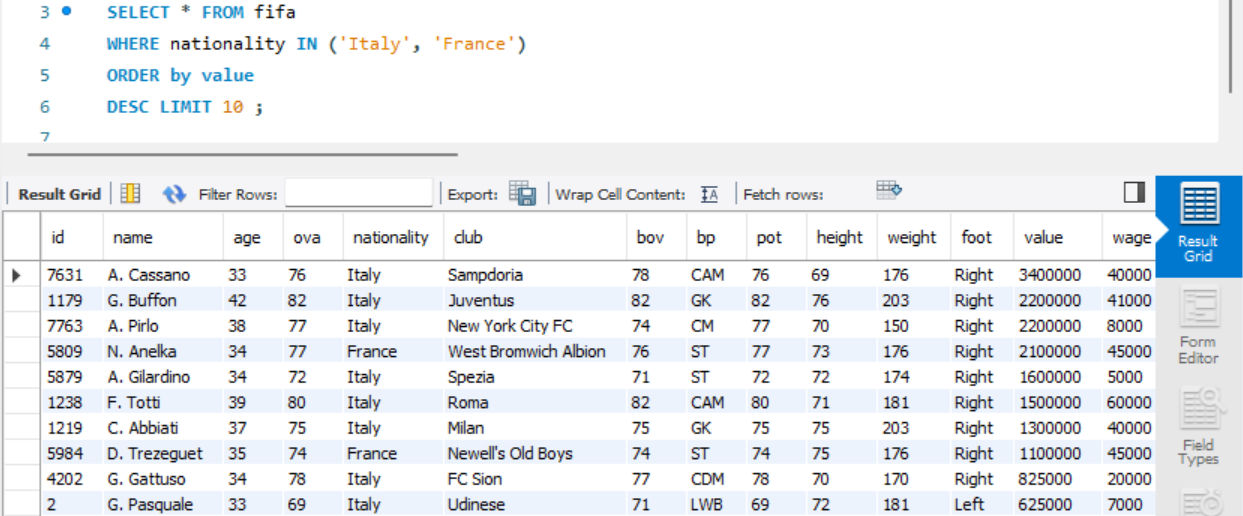